# Линейная регрессия с нуля

In [3]:
from IPython import display
from matplotlib import pyplot as plt
import torch
import random

%matplotlib inline

## Генерируем данные

In [4]:
num_inputs = 2
num_examples = 1000
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features = torch.randn((num_examples, num_inputs))
labels = torch.mv(features, true_w) + true_b
labels += torch.randn(labels.shape)

In [6]:
labels.shape

torch.Size([1000])

In [7]:
features.shape

torch.Size([1000, 2])

## Визуализируем сгенерированные данные

In [9]:
features[:, 0].shape

torch.Size([1000])

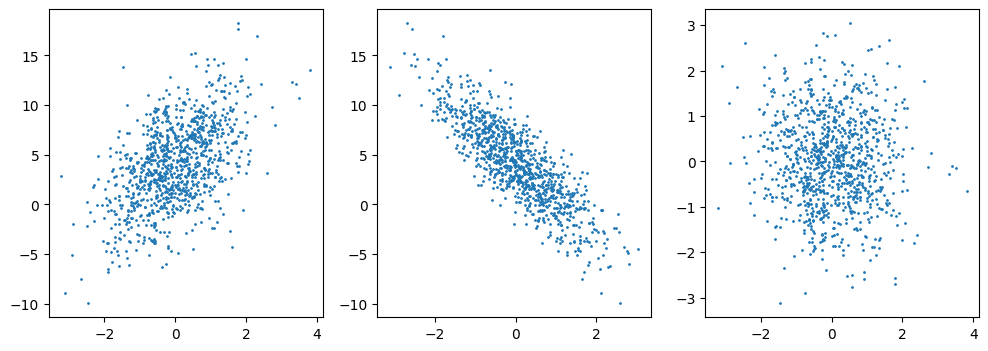

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.scatter(features[:, 0], labels, 1)
plt.subplot(132)
plt.scatter(features[:, 1], labels, 1)
plt.subplot(133)
plt.scatter(features[:, 0], features[:, 1], 1)
plt.show()

## Чтение данных

### Функция-итератор

1. Аргументы: размер батча, входные данные, верные признаки.
2. Внутренние переменные: индексы записей из обучающей выборки, которые перемешиваются.
3. Сам итератор

Итерируемся по датасету и возвращаем случайные `batch_size` примеров

In [11]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = indices[i: min(i + batch_size, num_examples)]
        yield features[j, :], labels[j]

### Выводим батч размером 10 записей

In [14]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X,'\n', y)
    break

tensor([[-1.9390,  0.3345],
        [-0.6712, -0.3826],
        [-0.4204,  0.0709],
        [ 1.6499,  0.7428],
        [-0.6862, -0.5137],
        [ 0.4624,  0.8789],
        [-0.2990, -0.0896],
        [-1.4724, -3.1245],
        [-1.6732, -0.7851],
        [ 0.1588,  0.3072]]) 
 tensor([-0.0528,  4.0368,  2.3977,  6.2267,  3.0443,  0.7005,  2.4611, 13.8615,
         5.2243,  3.0398])


In [24]:
# или так:
next(data_iter(batch_size, features, labels))

(tensor([[-0.2474,  0.2187],
         [ 0.9150, -0.0283],
         [ 0.3320, -0.7896],
         [-0.9043,  1.3470],
         [-1.9158,  0.6539],
         [ 0.5672,  2.1298],
         [-1.3144,  1.7946],
         [ 1.0052,  0.3084],
         [ 0.3105, -1.0704],
         [ 0.8774, -0.5733]]),
 tensor([ 1.6219,  4.3470,  5.8367, -3.8934, -3.9145, -0.5504, -6.0867,  5.4651,
          7.4281,  8.9811]))

## Создаем модель для обучения

In [25]:
# Генерируем веса:
w = torch.randn((num_inputs))
b = torch.zeros((1,))

In [26]:
print(w)
print(b)

tensor([ 0.8709, -1.8321])
tensor([0.])


In [29]:
# подключаем к тезнорам параметров градиенты:
w.requires_grad_()
b.requires_grad_()

tensor([0.], requires_grad=True)

### Вспомогательные функции

In [ ]:
# model function
def linreg(X, w, b):
    return torch.mv(X, w) + b

In [36]:
# loss function
def squared_loss(y_hat, y):
    return ((y_hat - y.reshape(y_hat.shape)) ** 2).mean()

In [32]:
# sgd function
def sgd(params, lr):
    for param in params:
        param.data[:] = param - lr * param.grad

### Обучающий цикл

In [39]:
lr = 0.01
num_epochs = 10

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        w = w.detach()
        b = b.detach()
        w.requires_grad_()
        b.requires_grad_()

        l = squared_loss(linreg(X, w, b), y)
        l.backward()
        sgd([w, b], lr)
    train_l = squared_loss(linreg(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))    

epoch 1, loss 0.990995
epoch 2, loss 0.991158
epoch 3, loss 0.991345
epoch 4, loss 0.991877
epoch 5, loss 0.990754
epoch 6, loss 0.992023
epoch 7, loss 0.991942
epoch 8, loss 0.991170
epoch 9, loss 0.990797
epoch 10, loss 0.990569


## Оценка качества модели

In [40]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)
print(w)
print(b)

Error in estimating w tensor([0.0042, 0.0075], grad_fn=<SubBackward0>)
Error in estimating b tensor([0.0190], grad_fn=<RsubBackward1>)
tensor([ 1.9958, -3.4075], requires_grad=True)
tensor([4.1810], requires_grad=True)


# Линейная регрессия на torch

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [61]:
# Перегенерируем данные
num_inputs = 2
num_examples = 1000
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features = torch.randn((num_examples, num_inputs))
labels = torch.mv(features, true_w) + true_b
labels += torch.randn(labels.shape)

## Создаем датасет и итератор

In [62]:
batch_size = 10

dataset = TensorDataset(features, labels)
data_iter = DataLoader(dataset, batch_size, shuffle=True)

In [63]:
dataset

In [64]:
data_iter

In [65]:
# Посмотрим на батч:
for X, y in data_iter:
    print(X, y)
    break

tensor([[ 2.5751,  0.6983],
        [-0.7745,  1.8302],
        [ 1.7140, -0.7583],
        [-0.5916,  1.5118],
        [-0.2842,  1.3349],
        [-1.7746,  0.7692],
        [-0.5781, -1.2844],
        [ 0.1976, -0.4298],
        [ 0.6355, -1.8020],
        [-0.6019, -0.1617]]) tensor([ 5.2155, -2.2367, 10.4149, -2.1719,  0.1973, -0.8250,  6.6164,  7.0488,
        12.0815,  2.4215])


## Построение модели

In [66]:
model = torch.nn.Sequential(torch.nn.Linear(2, 1))
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [56]:
# инициализация параметров
model[0].weight.data = true_w.clone().detach().requires_grad_(True).reshape((1, 2))
model[0].bias.data = torch.tensor([true_b], requires_grad = True)

In [67]:
loss = torch.nn.MSELoss(reduction='mean')

In [68]:
trainer = torch.optim.SGD(model.parameters(), lr=0.001)

## Цикл обучения

In [69]:
num_epochs = 100
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        trainer.zero_grad()
        l = loss(model(X).reshape(-1), y)
        l.backward()
        trainer.step()
    l = loss(model(features).reshape(-1), labels)
    if epoch % 5 == 0:
        print('epoch %d, loss: %f' % (epoch, l.item()),'|\tw', model[0].weight.data, '|\tb', model[0].bias.data)    

epoch 5, loss: 4.748549 |	w tensor([[ 1.0978, -2.3360]]) |	b tensor([2.9315])
epoch 10, loss: 1.499755 |	w tensor([[ 1.6738, -3.0422]]) |	b tensor([3.7411])
epoch 15, loss: 1.112927 |	w tensor([[ 1.8651, -3.2808]]) |	b tensor([4.0303])
epoch 20, loss: 1.066694 |	w tensor([[ 1.9284, -3.3629]]) |	b tensor([4.1333])
epoch 25, loss: 1.061313 |	w tensor([[ 1.9486, -3.3899]]) |	b tensor([4.1693])
epoch 30, loss: 1.060631 |	w tensor([[ 1.9555, -3.3986]]) |	b tensor([4.1828])
epoch 35, loss: 1.060553 |	w tensor([[ 1.9575, -3.4006]]) |	b tensor([4.1873])
epoch 40, loss: 1.060535 |	w tensor([[ 1.9590, -3.4025]]) |	b tensor([4.1895])
epoch 45, loss: 1.060534 |	w tensor([[ 1.9587, -3.4033]]) |	b tensor([4.1901])
epoch 50, loss: 1.060532 |	w tensor([[ 1.9591, -3.4021]]) |	b tensor([4.1904])
epoch 55, loss: 1.060532 |	w tensor([[ 1.9595, -3.4023]]) |	b tensor([4.1908])
epoch 60, loss: 1.060533 |	w tensor([[ 1.9598, -3.4028]]) |	b tensor([4.1908])
epoch 65, loss: 1.060532 |	w tensor([[ 1.9589, -3.402

In [70]:
model[0].weight.data

tensor([[ 1.9587, -3.4013]])

In [72]:
model[0].bias.data

tensor([4.1930])